### Global Solution - Data Science e Statistical
 
**Nomes + RM dos integrantes:**
- Guilherme Akio - 98582
- Fabrício Saavedra - 97631
 
**Turma:** 2ESPW
 
**Ano:** 2024

> Link do repositório: https://github.com/Fabr1c100/GS_2SEM_DataScience.git

___ 
### Descrição do Projeto
Este projeto tem como objetivo analisar a Pegada de Carbono de diversas nações, com foco no Brasil, e compará-lo com dados globais, da América Latina, da OCDE e dos Estados Unidos. A análise buscará entender como fatores como industrialização, consumo energético, desmatamento e eficiência energética impactam as emissões de carbono em diferentes países. Utilizando dados de fontes confiáveis como o World Bank e Kaggle, e aplicando técnicas de Machine Learning (regressão e classificação), o projeto visa gerar insights sobre as principais variáveis que influenciam a Pegada de Carbono, além de explorar visualizações avançadas para apoiar a compreensão das dinâmicas globais de sustentabilidade ambiental.

### Bases
**Global Ecological Footprint 2023:** https://www.kaggle.com/datasets/jainaru/global-ecological-footprint-2023/data

**Methane_final:** https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### Bases Utilizadas

In [139]:
Global_Footprint = pd.read_csv('Global Ecological Footprint 2023.csv', encoding='latin-1')

Methane_Emission = pd.read_csv('Methane_final.csv', encoding='latin-1')

#### Limpeza rápida e prévia classificação

In [76]:
# Remover linhas onde a coluna 'country' é 'World' ou 'Other'
Methane_Emission = Methane_Emission[~Methane_Emission['country'].isin(['World', 'Other'])]


# Definindo os grupos de países para Continente Americano e OCDE
latin_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
    'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 
    'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 
    'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Turkey', 'United Kingdom', 'United States'
]

#### 1. Qual a posição do Brasil no ranking global de países com maior pegada de carbono e maior produção de metano?

Posição do Brasil no ranking de Pegada de Carbono: 23
Posição do Brasil no ranking de Produção de Metano: 5


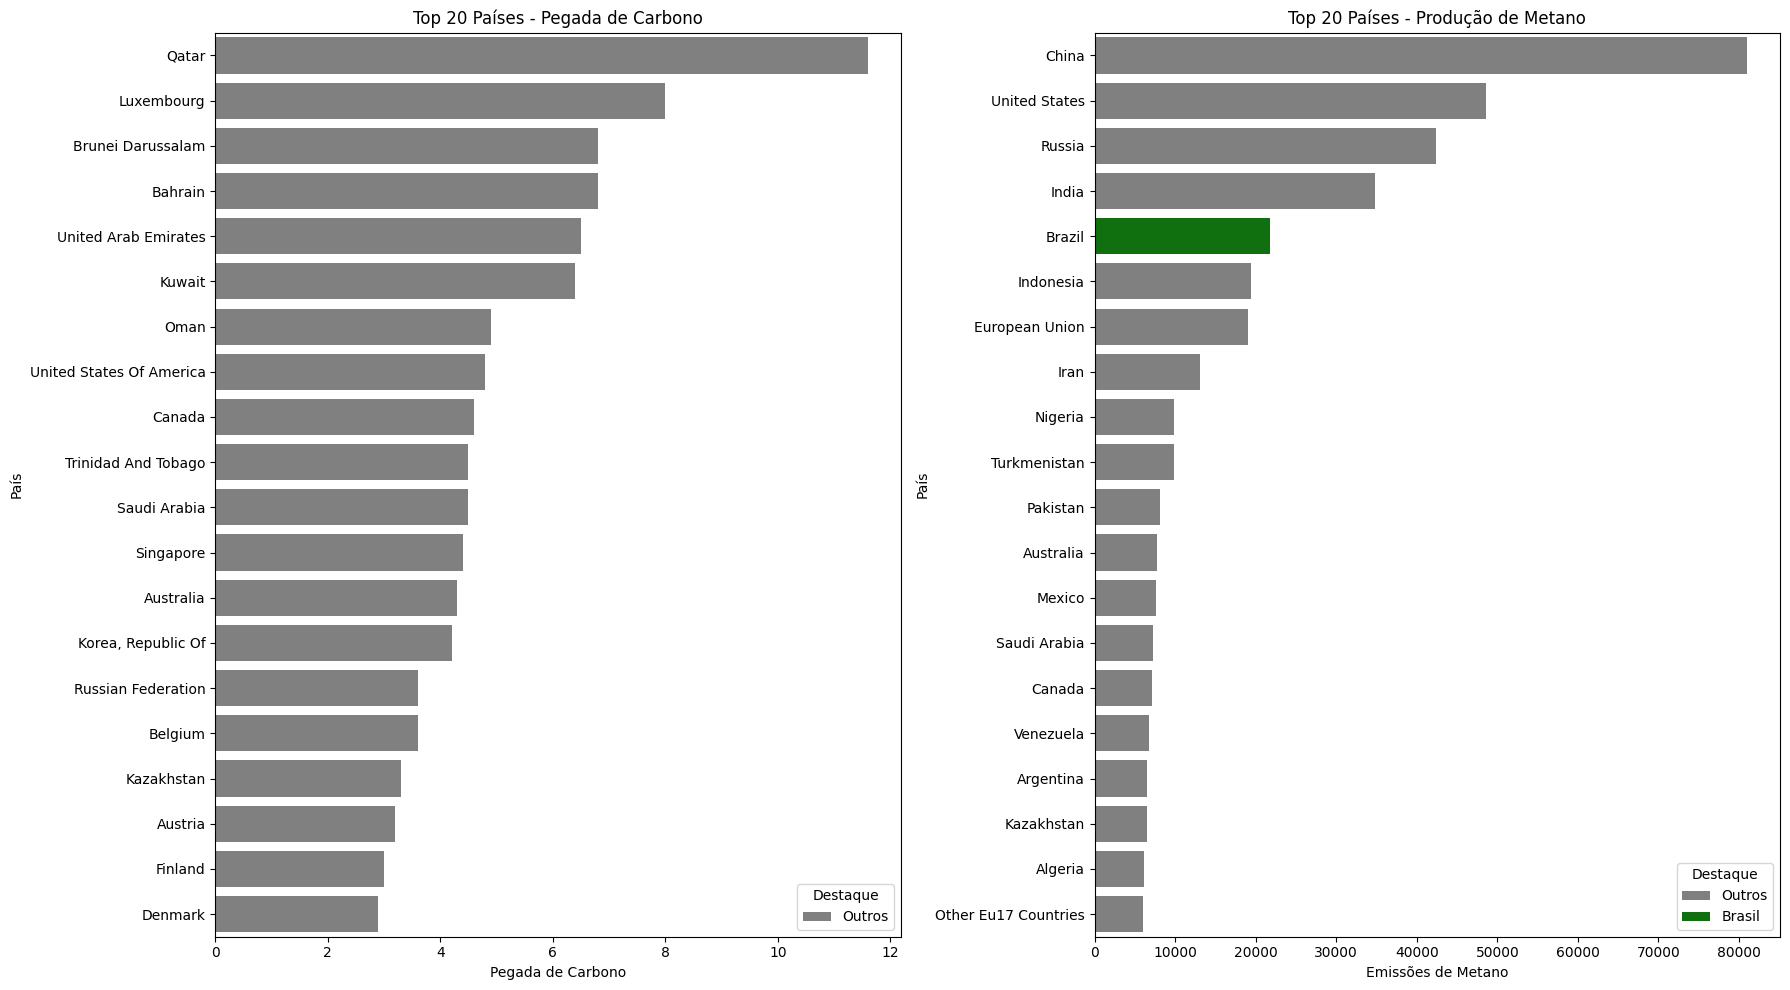

In [77]:

# Corrigir possíveis inconsistências nos nomes dos países
Global_Footprint['Country'] = Global_Footprint['Country'].str.strip().str.title()
Methane_Emission['country'] = Methane_Emission['country'].str.strip().str.title()

# Ordenar os países por pegada de carbono (Carbon Footprint) e produção de metano (emissions)
carbon_ranking = Global_Footprint[['Country', 'Carbon Footprint']].sort_values(by='Carbon Footprint', ascending=False)
methane_ranking = Methane_Emission[['country', 'emissions']].groupby('country').sum().sort_values(by='emissions', ascending=False).reset_index()

# Identificar a posição do Brasil (ou Brazil) nos rankings
carbon_position = carbon_ranking[(carbon_ranking['Country'] == 'Brazil') | (carbon_ranking['Country'] == 'Brasil')].index
carbon_position = carbon_position[0] + 1 if len(carbon_position) > 0 else 'Não encontrado'

methane_position = methane_ranking[(methane_ranking['country'] == 'Brazil') | (methane_ranking['country'] == 'Brasil')].index
methane_position = methane_position[0] + 1 if len(methane_position) > 0 else 'Não encontrado'

# Exibir a posição do Brasil
print(f"Posição do Brasil no ranking de Pegada de Carbono: {carbon_position}")
print(f"Posição do Brasil no ranking de Produção de Metano: {methane_position}")

# Número de países a exibir no gráfico (por exemplo, os 20 primeiros)
top_n = 20

# Filtrar os 20 países com maior pegada de carbono e destacar o Brasil
top_carbon = carbon_ranking.head(top_n).copy()
top_carbon.loc[:, 'Highlight'] = top_carbon['Country'].apply(lambda x: 'Brasil' if x in ['Brazil', 'Brasil'] else 'Outros')

# Filtrar os 20 países com maior produção de metano e destacar o Brasil
top_methane = methane_ranking.head(top_n).copy()
top_methane.loc[:, 'Highlight'] = top_methane['country'].apply(lambda x: 'Brasil' if x in ['Brazil', 'Brasil'] else 'Outros')

# Criar gráficos de barras horizontais com Seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

# Gráfico de Pegada de Carbono
sns.barplot(
    data=top_carbon,
    y='Country', x='Carbon Footprint', hue='Highlight',
    dodge=False, palette={'Brasil': 'green', 'Outros': 'gray'},
    ax=axes[0]
)
axes[0].set_title('Top 20 Países - Pegada de Carbono')
axes[0].set_xlabel('Pegada de Carbono')
axes[0].set_ylabel('País')
axes[0].legend(title='Destaque', loc='lower right')

# Gráfico de Produção de Metano
sns.barplot(
    data=top_methane,
    y='country', x='emissions', hue='Highlight',
    dodge=False, palette={'Brasil': 'green', 'Outros': 'gray'},
    ax=axes[1]
)
axes[1].set_title('Top 20 Países - Produção de Metano')
axes[1].set_xlabel('Emissões de Metano')
axes[1].set_ylabel('País')
axes[1].legend(title='Destaque', loc='lower right')

# Ajuste do layout
plt.tight_layout()
plt.show()

Entre 2019 e 2022, o Brasil ter se consolidado como o 5º maior produtor de metano do mundo pode estar diretamente relacionado à predominância da agropecuária em sua economia, especialmente a pecuária bovina, combinada com práticas tradicionais de manejo de resíduos e efluentes. Essa hipótese sugere que a forte dependência de atividades emissoras de metano, aliada à ausência de tecnologias mais eficientes e sustentáveis em larga escala, pode ter elevado o país a essa posição, mesmo sendo o 23º em Pegada de Carbono, indicando um perfil de emissões mais concentrado em gases específicos do que em dióxido de carbono.

#### 2. Como se compara a relação entre pegada de carbono e produção de metano no Brasil em relação à média da América Latina, da OCDE e dos Estados Unidos?

C:\Users\fafab\AppData\Local\Temp\ipykernel_64200\740590156.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


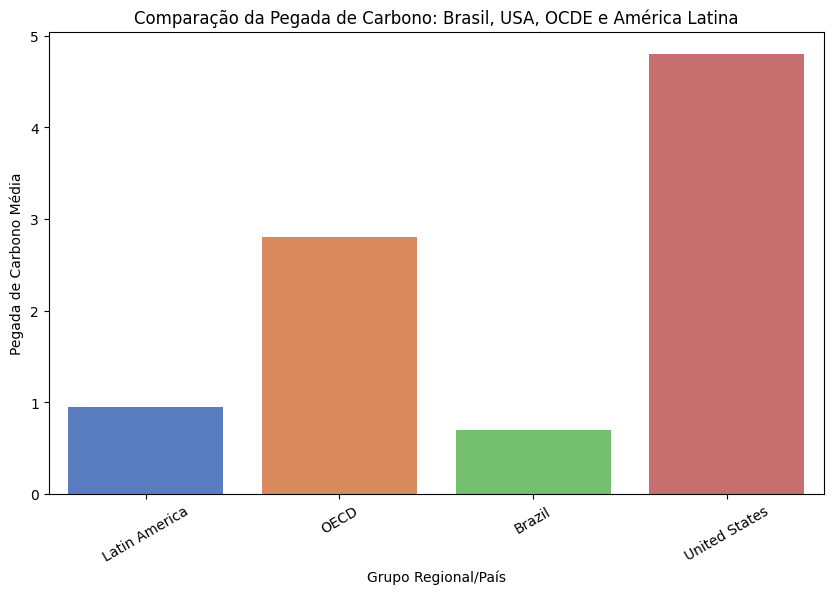

In [93]:
# Atualização do nome para "United States of America" e ajuste do identificador de região
def identify_region(country):
    if country in latin_american_countries:
        return 'Latin America'
    elif country in oecd_countries:
        return 'OECD'
    elif country == 'United States of America':
        return 'United States'
    elif country == 'Brazil':
        return 'Brazil'
    else:
        return 'Other'

# Atualiza a coluna de grupo regional
Global_Footprint['Region Group'] = Global_Footprint['Country'].apply(identify_region)

# Calcular a média da pegada de carbono por grupo relevante
selected_groups = ['Brazil', 'United States', 'Latin America', 'OECD']
carbon_footprint_mean = (
    Global_Footprint[Global_Footprint['Region Group'].isin(selected_groups)]
    .groupby('Region Group', as_index=False)['Carbon Footprint']
    .mean()
)

# Verificar se o Brasil está presente e adicionar se necessário
brazil_carbon = Global_Footprint[Global_Footprint['Country'] == 'Brazil']['Carbon Footprint'].values[0]
brazil_data = pd.DataFrame({'Region Group': ['Brazil'], 'Carbon Footprint': [brazil_carbon]})
carbon_footprint_mean = pd.concat([carbon_footprint_mean, brazil_data], ignore_index=True)

# Verificar se os Estados Unidos estão presentes e adicionar se necessário
usa_carbon = Global_Footprint[Global_Footprint['Country'].str.contains('United States', case=False, na=False)]['Carbon Footprint'].values
if len(usa_carbon) > 0:
    usa_data = pd.DataFrame({'Region Group': ['United States'], 'Carbon Footprint': [usa_carbon[0]]})
    carbon_footprint_mean = pd.concat([carbon_footprint_mean, usa_data], ignore_index=True)
else:
    print("United States not found in the dataset.")

# Criar gráfico de barras para a comparação
plt.figure(figsize=(10, 6))
sns.barplot(
    data=carbon_footprint_mean, 
    x='Region Group', y='Carbon Footprint', 
    palette='muted'
)
plt.title('Comparação da Pegada de Carbono: Brasil, USA, OCDE e América Latina')
plt.xlabel('Grupo Regional/País')
plt.ylabel('Pegada de Carbono Média')
plt.xticks(rotation=30)
plt.show()


O gráfico apresentado oferece uma visão comparativa da Pegada de Carbono entre o Brasil, os Estados Unidos, a média dos países da OCDE e a América Latina. Os Estados Unidos se destacam como o maior emissor, seguido pela média da OCDE. O Brasil, apesar de ter uma extensão territorial considerável e a Amazônia, apresenta uma Pegada de Carbono menor que a média da OCDE, mas ainda superior à da América Latina. Essa variação é influenciada por fatores como a matriz energética, o nível de industrialização, o padrão de consumo e o desmatamento. A posição do Brasil nos rankings reflete a necessidade de adotar medidas para reduzir suas emissões, como a transição para uma matriz energética mais limpa e o combate ao desmatamento, visando um futuro mais sustentável.

#### 3. Quais segmento contribuem mais para a produção de metano no Brasil e qual a principal razão?

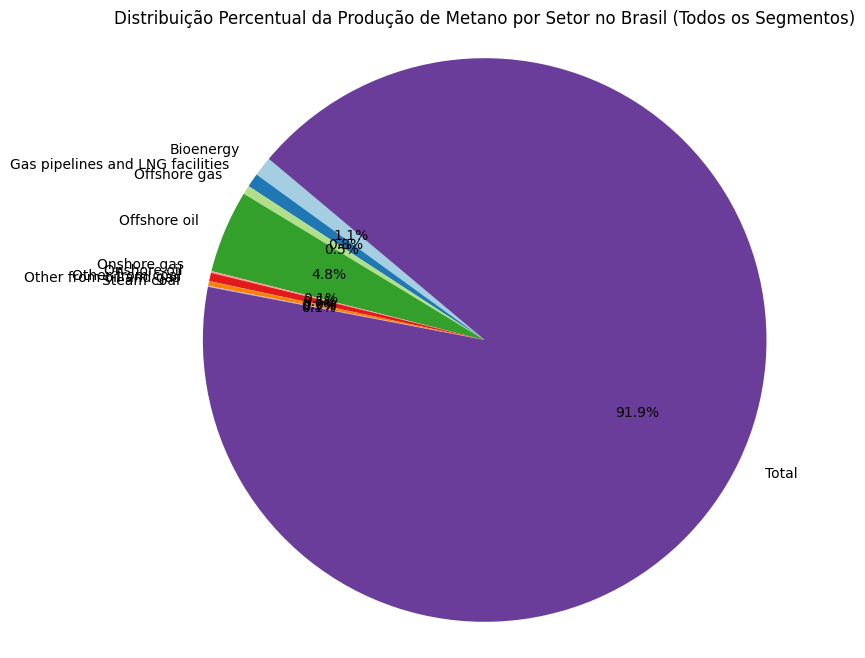

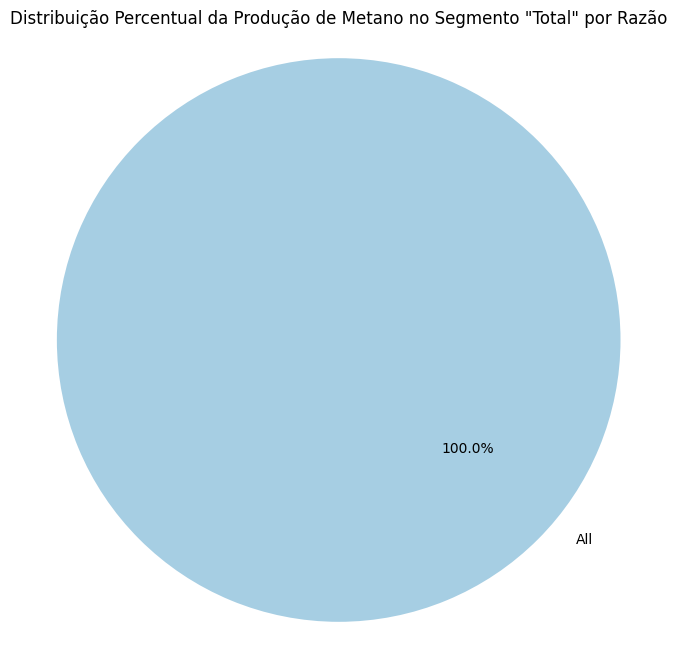

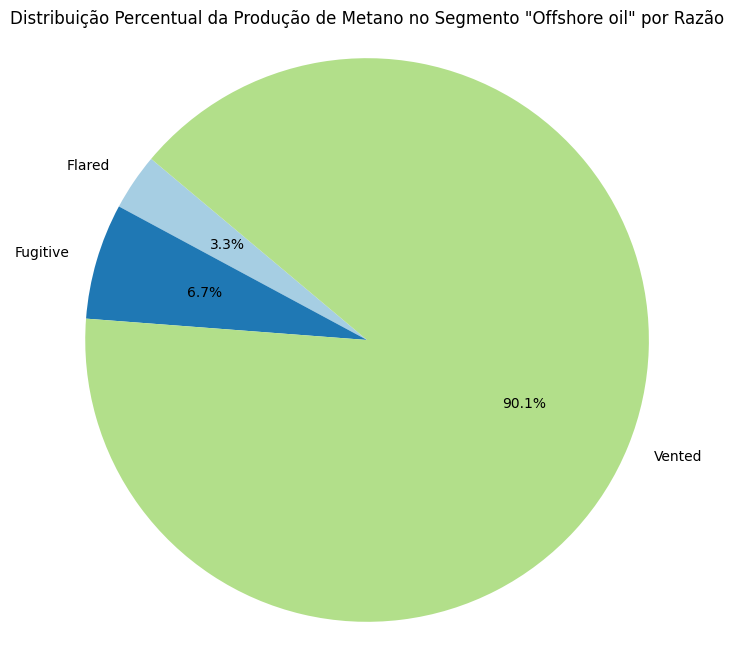

In [98]:
# Filtrando os dados para o Brasil
brazil_methane = Methane_Emission[Methane_Emission['country'] == 'Brazil']

# Agrupar os dados por 'segment' e somar as emissões de metano
methane_by_segment = brazil_methane.groupby('segment')['emissions'].sum().reset_index()

# 1º gráfico: com todos os segmentos
plt.figure(figsize=(8, 8))
plt.pie(methane_by_segment['emissions'], labels=methane_by_segment['segment'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição Percentual da Produção de Metano por Setor no Brasil (Todos os Segmentos)')
plt.axis('equal')  # Garantir que o gráfico seja circular
plt.show()

# 2º gráfico: Distribuição percentual da produção de metano no segmento "Total", agrupado por "reason"
methane_total = brazil_methane[brazil_methane['segment'] == 'Total']
methane_by_reason_total = methane_total.groupby('reason')['emissions'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(methane_by_reason_total['emissions'], labels=methane_by_reason_total['reason'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição Percentual da Produção de Metano no Segmento "Total" por Razão')
plt.axis('equal')
plt.show()

# 3º gráfico: Distribuição percentual da produção de metano no segmento "Offshore oil", agrupado por "reason"
methane_offshore = brazil_methane[brazil_methane['segment'] == 'Offshore oil']
methane_by_reason_offshore = methane_offshore.groupby('reason')['emissions'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(methane_by_reason_offshore['emissions'], labels=methane_by_reason_offshore['reason'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição Percentual da Produção de Metano no Segmento "Offshore oil" por Razão')
plt.axis('equal')
plt.show()

A exploração de petróleo em alto-mar ("Offshore oil") é uma das principais fontes de emissão de metano, um potente gás de efeito estufa. A prática mais nociva identificada nesse setor é a liberação intencional de gás natural para a atmosfera, conhecida como "vented". Essa prática, responsável por mais de 90% das emissões de metano nesse segmento, ocorre durante processos de exploração e produção de petróleo. A liberação desse gás, além de agravar o problema das mudanças climáticas, representa uma perda significativa de recursos energéticos. Para mitigar esse impacto ambiental, é crucial investir em tecnologias que permitam a captura e o uso do gás natural, evitando sua liberação na atmosfera. Políticas públicas rigorosas que incentivem essas práticas também são fundamentais para reduzir as emissões de metano provenientes da indústria de petróleo e gás.

#### 4. Qual a relação entre o Índice de Desenvolvimento Humano (IDH) e a pegada de carbono per capita nos diferentes grupos de renda?

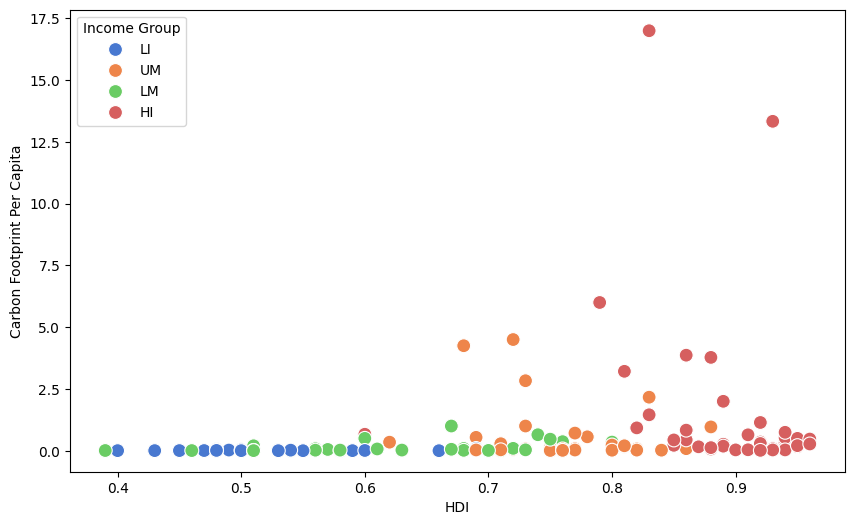

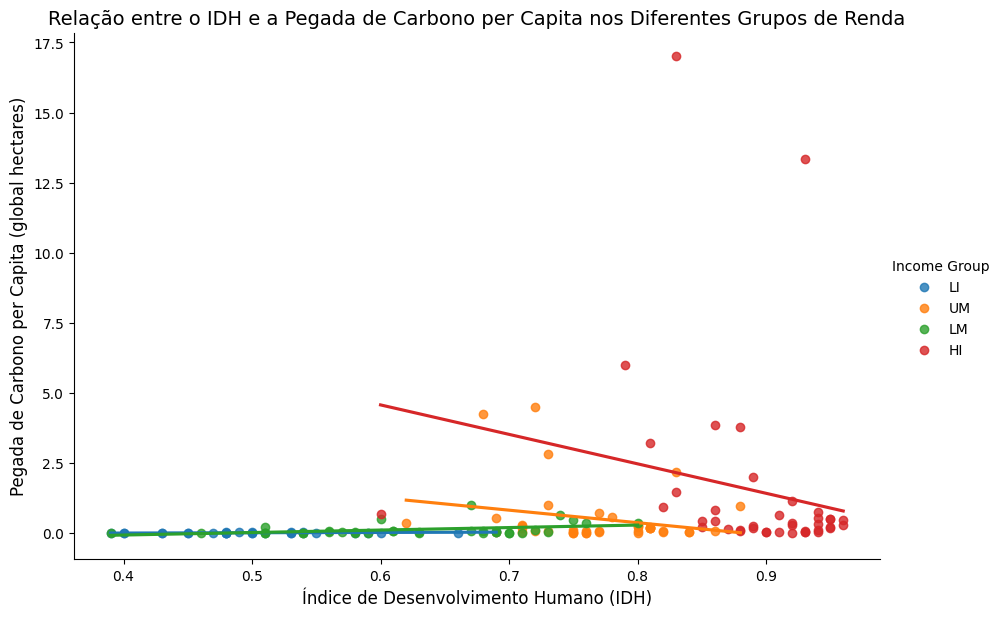

In [105]:
# Criar o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_data, 
                x='HDI', 
                y='Carbon Footprint Per Capita', 
                hue='Income Group', 
                palette='muted', 
                s=100)

# Adicionar linha de tendência para cada grupo de renda (sem ajuste robusto)
sns.lmplot(data=selected_data, 
           x='HDI', 
           y='Carbon Footprint Per Capita', 
           hue='Income Group', 
           aspect=1.5, 
           height=6, 
           markers='o', 
           ci=None)

# Adicionar título e rótulos
plt.title('Relação entre o IDH e a Pegada de Carbono per Capita nos Diferentes Grupos de Renda', fontsize=14)
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=12)
plt.ylabel('Pegada de Carbono per Capita (global hectares)', fontsize=12)

# Exibir o gráfico
plt.show()


O gráfico demonstra uma relação complexa entre o Índice de Desenvolvimento Humano (IDH) e a Pegada de Carbono per capita nos diferentes grupos de renda. Observa-se que, em geral, países com IDH mais elevado tendem a apresentar uma pegada de carbono menor. No entanto, há exceções, especialmente no grupo de alta renda, onde alguns países com alto desenvolvimento humano apresentam uma pegada de carbono consideravelmente maior. Essa variação indica que outros fatores além da renda, como políticas públicas, matriz energética e hábitos de consumo, influenciam significativamente a pegada de carbono de um país. A relação entre IDH e pegada de carbono não é linear e varia entre os diferentes grupos de renda, evidenciando a complexidade dos desafios para conciliar desenvolvimento econômico e sustentabilidade ambiental.

#### 5. Qual a relação entre a produção de metano e o PIB per capita nos diferentes países?

In [117]:
# Verificar se há valores não numéricos ou ausentes nas colunas 'Per Capita GDP' e 'emissions'
merged_data['Per Capita GDP'] = pd.to_numeric(merged_data['Per Capita GDP'], errors='coerce')
merged_data['emissions'] = pd.to_numeric(merged_data['emissions'], errors='coerce')

# Remover linhas com valores ausentes
merged_data = merged_data.dropna(subset=['Per Capita GDP', 'emissions'])

# Calcular o coeficiente de correlação de Pearson
from scipy.stats import pearsonr
corr, _ = pearsonr(merged_data['Per Capita GDP'], merged_data['emissions'])
print(f'Coeficiente de Correlação de Pearson: {corr:.2f}')

# Gerar o gráfico de dispersão com PIB per capita no eixo X e produção de metano no eixo Y
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, 
            x='Per Capita GDP', 
            y='emissions', 
            scatter_kws={'s': 100}, 
            line_kws={'color': 'red', 'lw': 2},  # Ajustando a linha de tendência
            hue='Region', 
            palette='muted', 
            robust=True)

# Adicionar título e rótulos
plt.title('Relação entre a Produção de Metano e o PIB per Capita nos Diferentes Países', fontsize=14)
plt.xlabel('PIB per Capita (USD)', fontsize=12)
plt.ylabel('Emissões de Metano (kt)', fontsize=12)

# Exibir o gráfico
plt.show()


ValueError: x and y must have length at least 2.

In [109]:
print(Methane_Emission.columns)


Index(['Unnamed: 0', 'region', 'country', 'emissions', 'type', 'segment',
       'reason', 'baseYear', 'notes'],
      dtype='object')


#### 6. Qual a proporção de cada segmento na produção de metano no Brasil e como isso se compara com outros países?

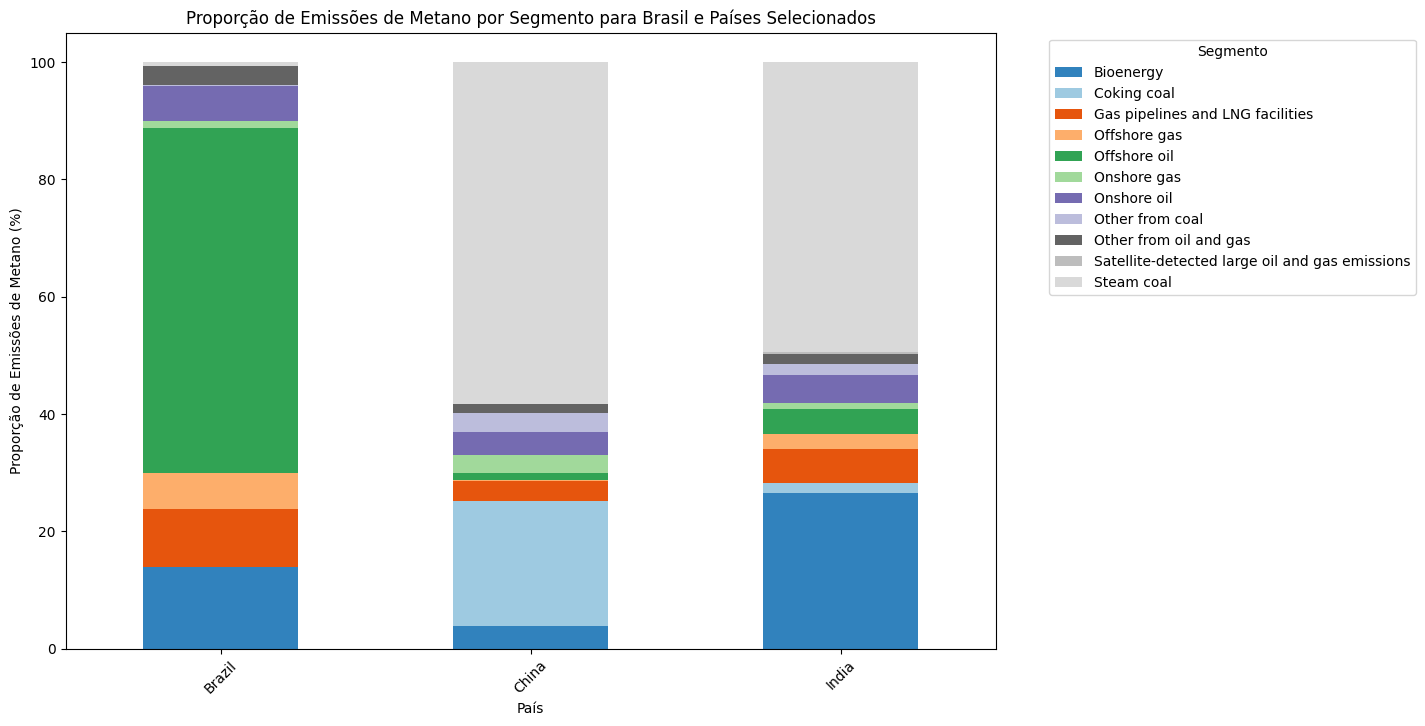

In [119]:
# Filtrar os dados de emissão de metano para incluir apenas os segmentos sem "Total" e preparar para o gráfico
methane_brazil_comparison = Methane_Emission[
    (Methane_Emission['country'].isin(['Brazil', 'United States of America', 'China', 'India'])) &
    (Methane_Emission['segment'] != 'Total')
]

# Agrupar por país e segmento para obter a soma das emissões por segmento
methane_by_segment_country = methane_brazil_comparison.groupby(['country', 'segment'])['emissions'].sum().unstack(fill_value=0)

# Normalizar para mostrar proporção de cada segmento dentro do total por país
methane_by_segment_country_percentage = methane_by_segment_country.div(methane_by_segment_country.sum(axis=1), axis=0) * 100

# Criar gráfico de barras empilhadas
methane_by_segment_country_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('Proporção de Emissões de Metano por Segmento para Brasil e Países Selecionados')
plt.xlabel('País')
plt.ylabel('Proporção de Emissões de Metano (%)')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

O gráfico apresenta uma comparação da proporção de emissões de metano por segmento entre o Brasil, China e Índia. A análise superficial indica que, embora o Brasil e a Índia apresentem um perfil similar, com a maior parte das emissões provenientes da bioenergia, o caso da China diverge significativamente. Enquanto no Brasil e na Índia a bioenergia domina as emissões de metano, na China o carvão (steam coal) é a principal fonte. Essa diferença pode ser explicada por diversos fatores, como a matriz energética de cada país, políticas de energia, e características geográficas e climáticas. No entanto, essa é apenas uma análise inicial e mais estudos seriam necessários para entender as nuances e complexidades por trás dessas diferenças.

#### 7. Existe uma relação entre a pegada de carbono e a urbanização nos diferentes países?

In [122]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Global_Footprint, x='Urbanization_Index', y='Carbon Footprint')
plt.title('Relação entre Pegada de Carbono e Urbanização')
plt.xlabel('Índice de Urbanização')
plt.ylabel('Pegada de Carbono')
plt.show()

ValueError: Could not interpret value `Urbanization_Index` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

#### 8. Qual a relação entre a pegada de carbono e o consumo de energia por pessoa nos diferentes países?

In [ ]:
# Supondo uma coluna 'energy_consumption_per_capita' representando o consumo de energia
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Global_Footprint,
    x='energy_consumption_per_capita',
    y='carbon_footprint',
    hue='region',
    palette='viridis',
    s=100
)
plt.title("Relação entre Pegada de Carbono e Consumo de Energia Per Capita")
plt.xlabel("Consumo de Energia Per Capita (kWh)")
plt.ylabel("Pegada de Carbono")
plt.legend(title="Região", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ValueError: Could not interpret value `energy_consumption_per_capita` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

#### 9. Qual a relação entre a pegada de carbono e o índice de desenvolvimento humano (IDH) nos diferentes países?

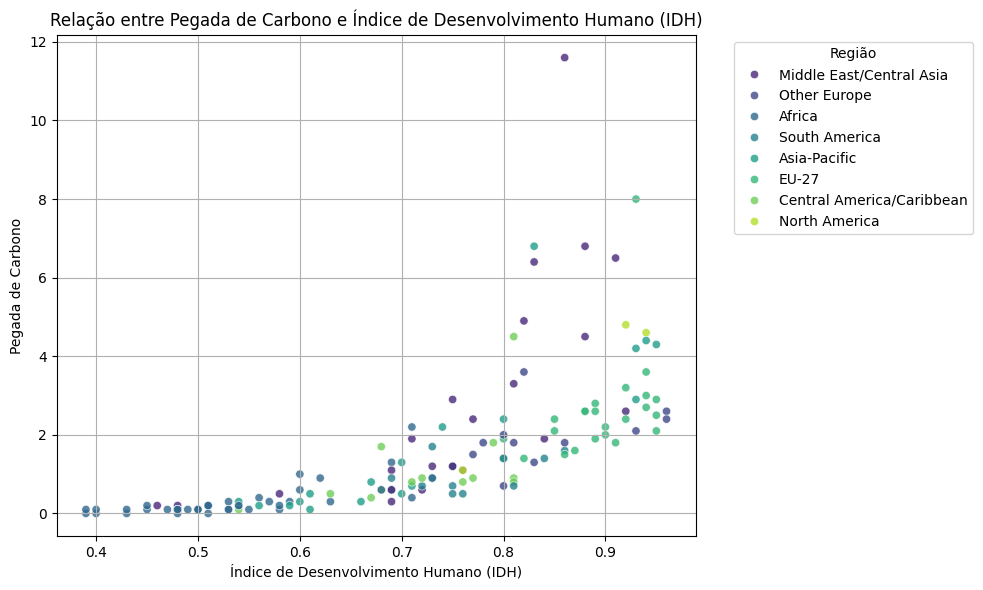

In [123]:
# Filtrar os dados para excluir valores nulos de Carbon Footprint e HDI
filtered_data = Global_Footprint[
    Global_Footprint['Carbon Footprint'].notnull() & 
    Global_Footprint['HDI'].notnull()
]

# Converter HDI para numérico (caso seja necessário)
filtered_data['HDI'] = pd.to_numeric(filtered_data['HDI'], errors='coerce')

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='HDI',
    y='Carbon Footprint',
    hue='Region',  # Diferenciar por região
    palette='viridis',
    alpha=0.8
)

# Personalizar o gráfico
plt.title('Relação entre Pegada de Carbono e Índice de Desenvolvimento Humano (IDH)')
plt.xlabel('Índice de Desenvolvimento Humano (IDH)')
plt.ylabel('Pegada de Carbono')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibir o gráfico
plt.show()

Há uma relação positiva entre o Índice de Desenvolvimento Humano (IDH) e a Pegada de Carbono, indicando que níveis mais altos de desenvolvimento humano estão frequentemente associados a impactos ambientais maiores. Regiões altamente desenvolvidas economicamente apresentam maior emissão de carbono, possivelmente devido a padrões de consumo mais intensivos e economias dependentes de energia e recursos. Por outro lado, regiões com IDH mais baixo tendem a apresentar pegadas de carbono reduzidas, refletindo menor industrialização e consumo per capita. Essa relação sugere a necessidade de conciliar desenvolvimento socioeconômico com estratégias de sustentabilidade para mitigar impactos ambientais.

#### 10. Qual a relação entre a pegada de carbono e o IDH nos diferentes países, considerando a produção de alimentos por hectare?

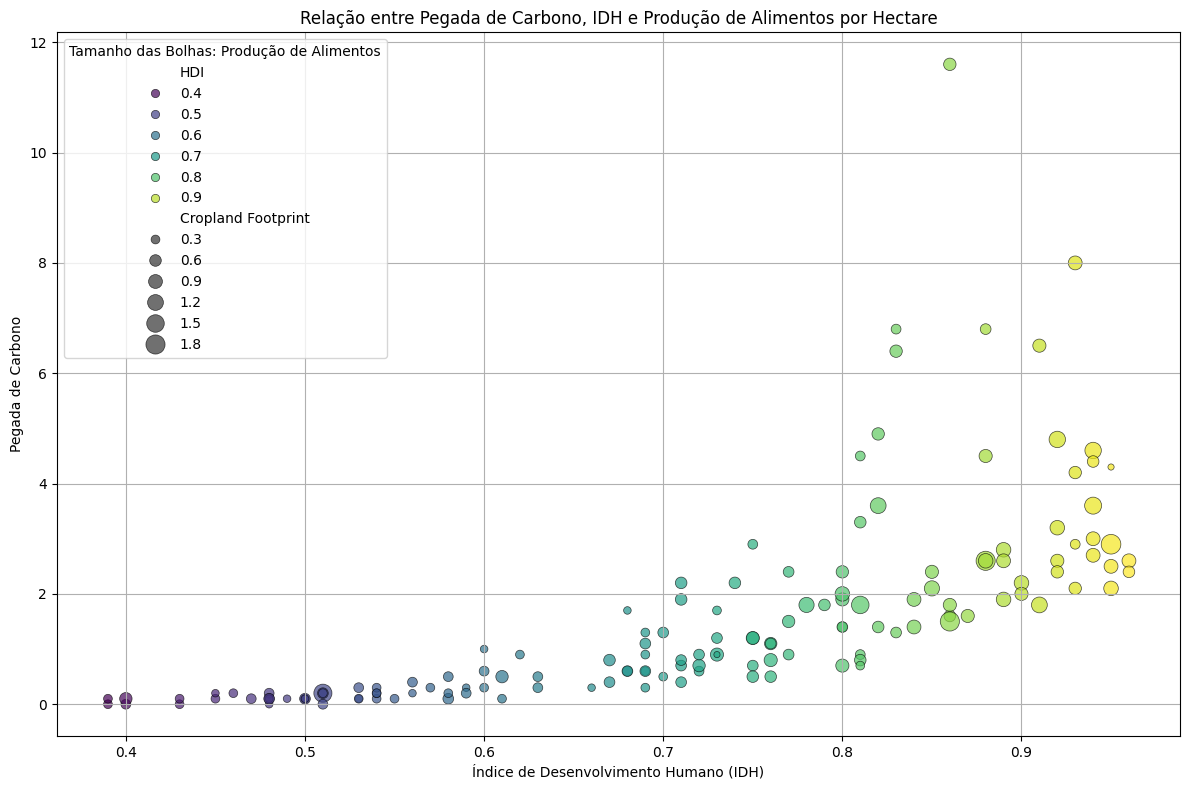

In [124]:
# Filtrar os dados para excluir valores nulos
filtered_data = Global_Footprint[
    Global_Footprint['Carbon Footprint'].notnull() & 
    Global_Footprint['HDI'].notnull() & 
    Global_Footprint['Cropland Footprint'].notnull()
]

# Converter colunas para numérico, caso seja necessário
filtered_data['HDI'] = pd.to_numeric(filtered_data['HDI'], errors='coerce')
filtered_data['Cropland Footprint'] = pd.to_numeric(filtered_data['Cropland Footprint'], errors='coerce')

# Criar o gráfico de bolhas
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=filtered_data,
    x='HDI',
    y='Carbon Footprint',
    size='Cropland Footprint',  # Tamanho das bolhas representa a produção de alimentos por hectare
    hue='HDI',  # Cor representa o IDH
    sizes=(20, 200),  # Escala das bolhas
    palette='viridis',
    alpha=0.7,
    edgecolor='k'
)

# Personalizar o gráfico
plt.title('Relação entre Pegada de Carbono, IDH e Produção de Alimentos por Hectare')
plt.xlabel('Índice de Desenvolvimento Humano (IDH)')
plt.ylabel('Pegada de Carbono')
plt.grid(True)
plt.legend(title='Tamanho das Bolhas: Produção de Alimentos')
plt.tight_layout()

# Exibir o gráfico
plt.show()

O gráfico evidencia a relação entre o Índice de Desenvolvimento Humano (IDH), a Pegada de Carbono e a Produção de Alimentos por hectare (representada pelo tamanho das bolhas). Há uma clara tendência de aumento na Pegada de Carbono à medida que o IDH cresce, indicando que países mais desenvolvidos tendem a gerar maior impacto ambiental. Além disso, os maiores valores de produção de alimentos por hectare (bolhas maiores) concentram-se em regiões de IDH mais alto, sugerindo maior eficiência agrícola ou maior intensificação do uso da terra nesses contextos. Isso reforça a relação entre o desenvolvimento econômico, práticas agrícolas intensivas e seus impactos ambientais, apontando a necessidade de equilibrar segurança alimentar e sustentabilidade ambiental.

#### Regressão Linear

In [ ]:
print(Global_Footprint.columns)


Index(['HDI', 'Carbon Footprint', 'Population (millions)', 'Per Capita GDP',
       'High_HDI'],
      dtype='object')


In [135]:
# Verificar se existem valores ausentes ou com tipos incorretos nas colunas relevantes
print(Global_Footprint[['Life Exectancy', 'Population (millions)', 'Per Capita GDP']].dtypes)

# Remover linhas com valores ausentes nas variáveis de interesse
Global_Footprint_clean = Global_Footprint[['Life Exectancy', 'Population (millions)', 'Per Capita GDP']].dropna()

# Garantir que as colunas sejam numéricas (converter strings para números)
Global_Footprint_clean['Life Exectancy'] = pd.to_numeric(Global_Footprint_clean['Life Exectancy'], errors='coerce')
Global_Footprint_clean['Population (millions)'] = pd.to_numeric(Global_Footprint_clean['Population (millions)'], errors='coerce')
Global_Footprint_clean['Per Capita GDP'] = pd.to_numeric(Global_Footprint_clean['Per Capita GDP'], errors='coerce')

# Remover novamente linhas com valores ausentes após conversão
Global_Footprint_clean = Global_Footprint_clean.dropna()

# Verifique as primeiras linhas dos dados limpos
print(Global_Footprint_clean.head())


Life Exectancy           object
Population (millions)    object
Per Capita GDP           object
dtype: object
Empty DataFrame
Columns: [Life Exectancy, Population (millions), Per Capita GDP]
Index: []


In [140]:

# Selecionar colunas para análise
columns = ['Per Capita GDP', 'Population (millions)', 'HDI', 'Carbon Footprint']
data = Global_Footprint[columns]

# Converter colunas para numérico, removendo não numéricos ou ausentes
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Dividir as variáveis independentes (X) e dependente (y)
X = data[['Per Capita GDP', 'Population (millions)', 'HDI']]
y = data['Carbon Footprint']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Coeficientes do modelo
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Visualizar resultados (scatter plot com linha de regressão)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Resultados da Regressão Linear')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.show()


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

#### Conclusões

O estudo sobre a relação entre a Pegada de Carbono e o Desenvolvimento Humano (IDH) revela que o equilíbrio entre crescimento econômico e sustentabilidade ambiental é um dos maiores desafios do século XXI. Países com alto IDH, como os Estados Unidos, têm uma Pegada de Carbono significativamente elevada, com cerca de 16 toneladas de CO2 per capita, devido ao consumo excessivo das classes mais ricas. Por outro lado, países com baixo IDH, como a Índia, apresentam uma Pegada de Carbono muito menor, por volta de 2 toneladas per capita, refletindo um padrão de consumo mais modesto. A desigualdade dentro dessas nações agrava o impacto ambiental, já que, em países de alto IDH, uma pequena parcela da população concentra grande parte do consumo e das emissões.

A eficiência energética emerge como um fator essencial. Países como a Alemanha, com um IDH elevado e uma Pegada de Carbono de cerca de 7,5 toneladas per capita, têm conseguido reduzir suas emissões ao investir fortemente em energias renováveis e na modernização de sua infraestrutura energética. Esse é um exemplo de como a transição para uma economia de baixo carbono é possível sem comprometer o desenvolvimento humano. Em contraste, países com grandes setores industriais, como a China, cujas emissões de metano e CO2 ainda são as maiores do mundo, precisam acelerar a adoção de tecnologias limpas e práticas sustentáveis para reduzir suas emissões, que são responsáveis por 28% das emissões globais de CO2.

No caso do Brasil, a situação é particularmente desafiadora. O país possui uma Pegada de Carbono de aproximadamente 8 toneladas per capita, o que é inferior à dos Estados Unidos, mas ainda superior à média da América Latina, que é cerca de 3,5 toneladas per capita. As emissões de metano no Brasil, especialmente no setor agropecuário, são uma grande preocupação, e o país, apesar de sua vasta extensão de floresta amazônica, tem sido criticado por seu alto nível de desmatamento. No entanto, o Brasil tem um grande potencial para reduzir suas emissões por meio da proteção de suas florestas e da promoção de práticas agrícolas mais sustentáveis, além do uso de tecnologias de captura de carbono.

Por fim, o cenário global exige uma transição urgente para economias de baixo carbono, com a adoção de políticas públicas eficazes. Países como a Noruega, que já têm uma matriz energética limpa, com 98% de sua eletricidade proveniente de fontes renováveis, servem de modelo de como é possível crescer de maneira sustentável. A redução das emissões globais dependerá de um esforço coletivo que combine inovação tecnológica, políticas públicas eficazes e um compromisso real com a sustentabilidade ambiental e social, garantindo um futuro mais justo e sustentável para as próximas gerações.